In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index, num2date
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [8]:
# Read data from NCDC THREDDS server: SST, SST anomales and ice concentrations
url1 = 'https://psl.noaa.gov/thredds/dodsC/Aggregations/OISSThires/sst.mean.nc'
url1a = 'https://psl.noaa.gov/thredds/dodsC/Aggregations/OISSThires/sst.anom.nc'
url2 = 'https://psl.noaa.gov/thredds/dodsC/Aggregations/OISSThires/icec.mean.nc'

dataset1 = Dataset(url1)
dataset1a = Dataset(url1a)
dataset2 = Dataset(url2)

timevar = dataset1.variables['time']
# Pick a time, e.g., Feb 15, 2020, and read just that date
#date = datetime(2020,3,15,0) 
#timeindex = date2index(date,timevar)
# -OR- let's try pick the most recent time
time_convert = num2date(timevar[:], timevar.units)
date = pd.to_datetime(time_convert)[-1]
timeindex = -1

sst = dataset1.variables['sst'][timeindex,:].squeeze()
sst_anom = dataset1a.variables['anom'][timeindex,:].squeeze()
ice = dataset2.variables['icec'][timeindex,:].squeeze()
lats = dataset1.variables['lat'][:]
lons = dataset1.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)

2020-04-11 00:00:00


Text(0.5, 1.0, 'SST and ICE analysis for 2020-04-11 00:00:00')

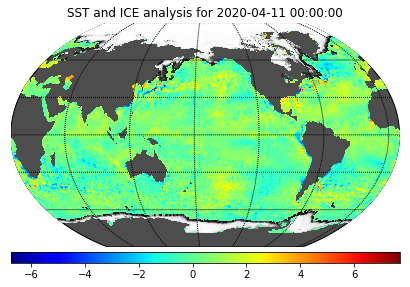

In [9]:
# Make the plots.  Here let's do one of the globe (Pacific center)
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])

# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=-170,resolution=None)

# color background of map projection region.
m.drawmapboundary(fill_color='0.3')

# plot sst, then ice
im1 = m.pcolormesh(lons,lats,sst_anom,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)

# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))

# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")

# add a title.
ax.set_title('SST and ICE analysis for %s'%date)

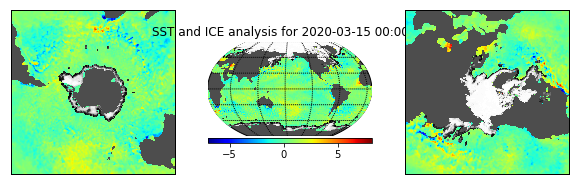

In [37]:
# Now make three plots, two polar plots and one global:

fig, ax = plt.subplots(1,3)

m =  Basemap(projection='spstere',lon_0=-170,boundinglat=-30,resolution=None, ax=ax[0])
m.drawmapboundary(fill_color='0.3')
im1 = m.pcolormesh(lons,lats,sst_anom,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)

ax[1].set_title('SST and ICE analysis for %s'%date)
m = Basemap(projection='kav7',lon_0=-170,resolution=None,ax=ax[1])
m.drawmapboundary(fill_color='0.3')
im1 = m.pcolormesh(lons,lats,sst_anom,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")

m =  Basemap(projection='npstere',lon_0=-170,boundinglat=30,resolution=None,ax=ax[2])
m.drawmapboundary(fill_color='0.3')
im1 = m.pcolormesh(lons,lats,sst_anom,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)